In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pylab
import numpy.polynomial.polynomial as poly
import numpy as np
from scipy.integrate import odeint
import math

### 3. Erzwungene Schwingung

Zunächst wird wieder ein Zustandsvektor definiert. Ausschlaggebend für die Simulation ist die Position sowie die Geschwindigkeit.

\begin{align}
\vec{z}= \left( \begin{array}{c}x\\v\end{array} \right)  
\vec{\dot{z}}= \left( \begin{array}{c}z(2)\\ \frac{1}{m}(F_0 \cdot cos{\omega t} -Dz(1)-cz(2)) \end{array} \right)
\end{align}

Der Zustand zum Zeitpunkt t = 0 wird festgelegt als:
\begin{align}
\vec{z_0}= \left( \begin{array}{c}x_0\\v_0\end{array} \right) = \left( \begin{array}{c}0\\0\end{array} \right)
\end{align}

Die Simulation wird für 2 unterschiedliche ω durchgefügt. Alle anderen Werte sind für beide Simulationen gleich. Für die numerische Berechnung wird ein Δt=0.00005 verwendet.

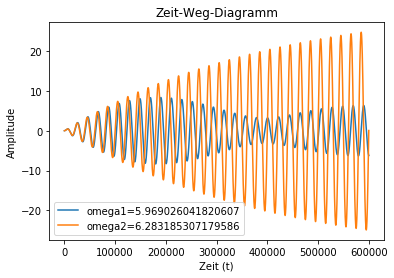

In [33]:
m = 1

z1=[[0,0]]
z2=[[0,0]]

dt = 0.00005
D = 4 * math.pi ** 2 * m 
omega1 = 1 * (2 * math.pi) * 0.95          # (2 * math.pi) => Eine Schwingung pro Sekunde
omega2 = 1 * (2 * math.pi)           # (2 * math.pi) => Eine Schwingung pro Sekunde
F0 = 20
c = 0.1
t = 0.0
tmax = 30

periodendauer = 2 * math.pi / omega1
omegaGes = 1 / periodendauer;
f0t = F0 / (omegaGes ** 2 * m)

def calcNext(innerz, inneromega):
    dz =   [innerz[-1][1], 1 / m * (F0 * math.cos(inneromega * t) - D * innerz[-1][0] - c * innerz[-1][1] )]
    znew = [innerz[-1][0] + dz[0] * dt , innerz[-1][1] + dz[1] * dt]
    innerz.append(znew)

def calcNext2(innerz):
    A = (F0/m)/(( ((D/m) - omegaGes ** 2)**2 + 4*(c/(2*m))**2*omegaGes**2)**0.5)
    znew = [t , A * math.sin(omegaGes * t * 2 * math.pi )]
    innerz.append(znew)

while t < tmax:
    t = t + dt
    calcNext(z1, omega1);
    calcNext(z2, omega2);
    #calcNext2(z2)

plt.plot(range(0,len(z1)), [element[0] for element in z1], label='omega1=' + str(omega1))
plt.plot(range(0,len(z2)), [element[0] for element in z2], label='omega2=' + str(omega2))

plt.title('Zeit-Weg-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Amplitude')
plt.legend()

In einem nächsten Schritt wird ein kleinerer nicht linearer Teil hinzugefügt. Alle anderen Werte bleiben identisch.

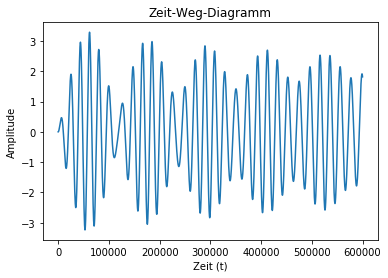

In [35]:
z1=[[0,0]]
z2=[[0,0]]
z3=[[0,0]]

m = 1

dt = 0.00005
D = 4 * math.pi ** 2 * m 
D3= 4 * math.pi ** 2 * m / 20
omega1 = 1 * (2 * math.pi) * 0.97          # (2 * math.pi) => Eine Schwingung pro Sekunde
omega2 = 1 * (2 * math.pi)           # (2 * math.pi) => Eine Schwingung pro Sekunde
F0 = 20
c = 0.1
t = 0.0
tmax = 30
    
def calcNextW(innerz, inneromega):
    dz =   [innerz[-1][1], 1 / m * (F0 * math.cos(inneromega * t) - D * innerz[-1][0] - D3 * innerz[-1][0]**3 - c * innerz[-1][1] )]
    znew = [innerz[-1][0] + dz[0] * dt , innerz[-1][1] + dz[1] * dt]
    innerz.append(znew)

while t < tmax:
    t = t + dt
    calcNextW(z1, omega1);

plt.title('Zeit-Weg-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Amplitude')
plt.plot(range(0,len(z1)), [element[0] for element in z1])

Es ist zu sehen, dass sich die bisherige Schwingung mit dem hinzugefügten Teil überlagert.

### 4. Das nichtlineare Pendel II


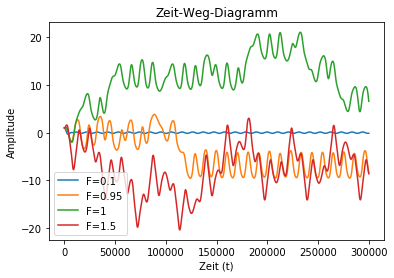

In [11]:
z1=[[1,0]]
z2=[[1,0]]
z3=[[1,0]]
z4=[[1,0]]

dt = 0.001

F1 = 0.1
F2 = 0.95
F3 = 1
F4 = 1.5

t = 0.0
tmax = 300
    
def calcNext(zinner, Finner):
    dz =   [zinner[-1][1], Finner * math.cos(0.6 * t) - 0.5 * zinner[-1][1] - math.sin(zinner[-1][0])]
    znew = [zinner[-1][0] + dz[0] * dt , zinner[-1][1] + dz[1] * dt]
    zinner.append(znew)
    

while t < tmax:
    t = t + dt
    calcNext(z1, F1);
    calcNext(z2, F2);
    calcNext(z3, F3);
    calcNext(z4, F4);
    
plt.plot(range(0,len(z1)), [element[0] for element in z1], label='F=' + str(F1))
plt.plot(range(0,len(z2)), [element[0] for element in z2], label='F=' + str(F2))
plt.plot(range(0,len(z3)), [element[0] for element in z3], label='F=' + str(F3))
plt.plot(range(0,len(z4)), [element[0] for element in z4], label='F=' + str(F4))

plt.title('Zeit-Weg-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Amplitude')
plt.legend()

Für die erste Schwingung (blau) ist zu erkennen, dass sie sehr schnell stabil wird. Das "Einschwingen" ist hier nicht zu erkennen. 
Auch die zweite Kurve (orange) wird nach einiger Zeit stabil. Hier lässt sich jedoch das "Einschwingen" beobachten.

Die beiden anderen Schwingungen erreichen keinen stabilen Zustand. Dies lässt sich daran erkennen, dass in deren Kurve keine Wiederholung zu sehen ist.

Als nächstes wird θ(θ') gebildet. Da der Zustandsvektor bereits den Ort θ sowie die Geschwindigkeit θ' enthällt, ist keine weitere numerische Berechnung notwendig. Die Graphen können direkt gezeichnet werden.

Text(0,0.5,"θ'(θ)")

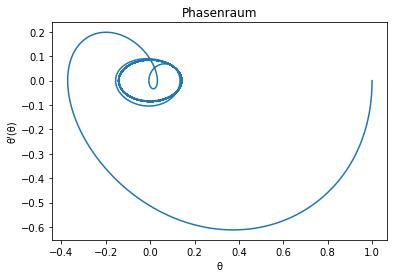

In [12]:
plt.plot([element[0] for element in z1], [element[1] for element in z1])

plt.title('Phasenraum')
plt.xlabel("θ")
plt.ylabel("θ'(θ)")

Wie bereits in oben stehender Graphik zu erkennen ist, erreicht die erste Schwingung äußerst schnell einen stabilen Zustand. (zu erkennen an der Schnellen Konvergenz)

Text(0,0.5,"θ'(θ)")

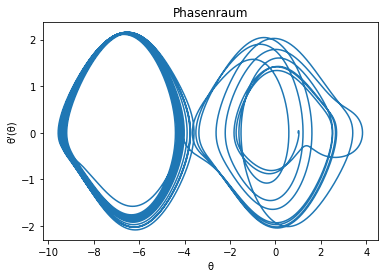

In [13]:
plt.plot([element[0] for element in z2], [element[1] for element in z2])

plt.title('Phasenraum')
plt.xlabel("θ")
plt.ylabel("θ'(θ)")

Auch Schwingung 2 erreicht einen stabilen Zustand. Jedoch wird hierfür mehr Zeit als bei Schwingung 1 benötigt.

Text(0,0.5,"θ'(θ)")

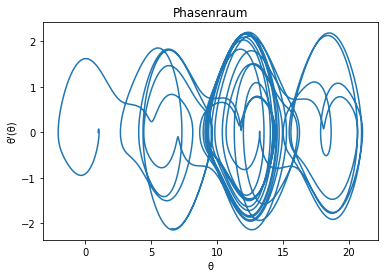

In [14]:
plt.plot([element[0] for element in z3], [element[1] for element in z3])

plt.title('Phasenraum')
plt.xlabel("θ")
plt.ylabel("θ'(θ)")

Text(0,0.5,"θ'(θ)")

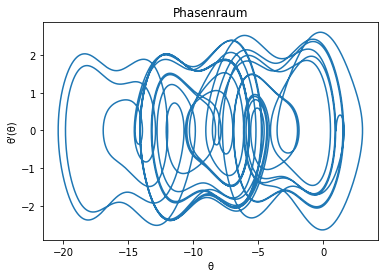

In [15]:
plt.plot([element[0] for element in z4], [element[1] for element in z4])

plt.title('Phasenraum')
plt.xlabel("θ")
plt.ylabel("θ'(θ)")

Auf dem Graph der letzen beiden Schwingungen ist keine Konvergenz zu erkennen.